#### **TRAINING AND TEST SPLITS**

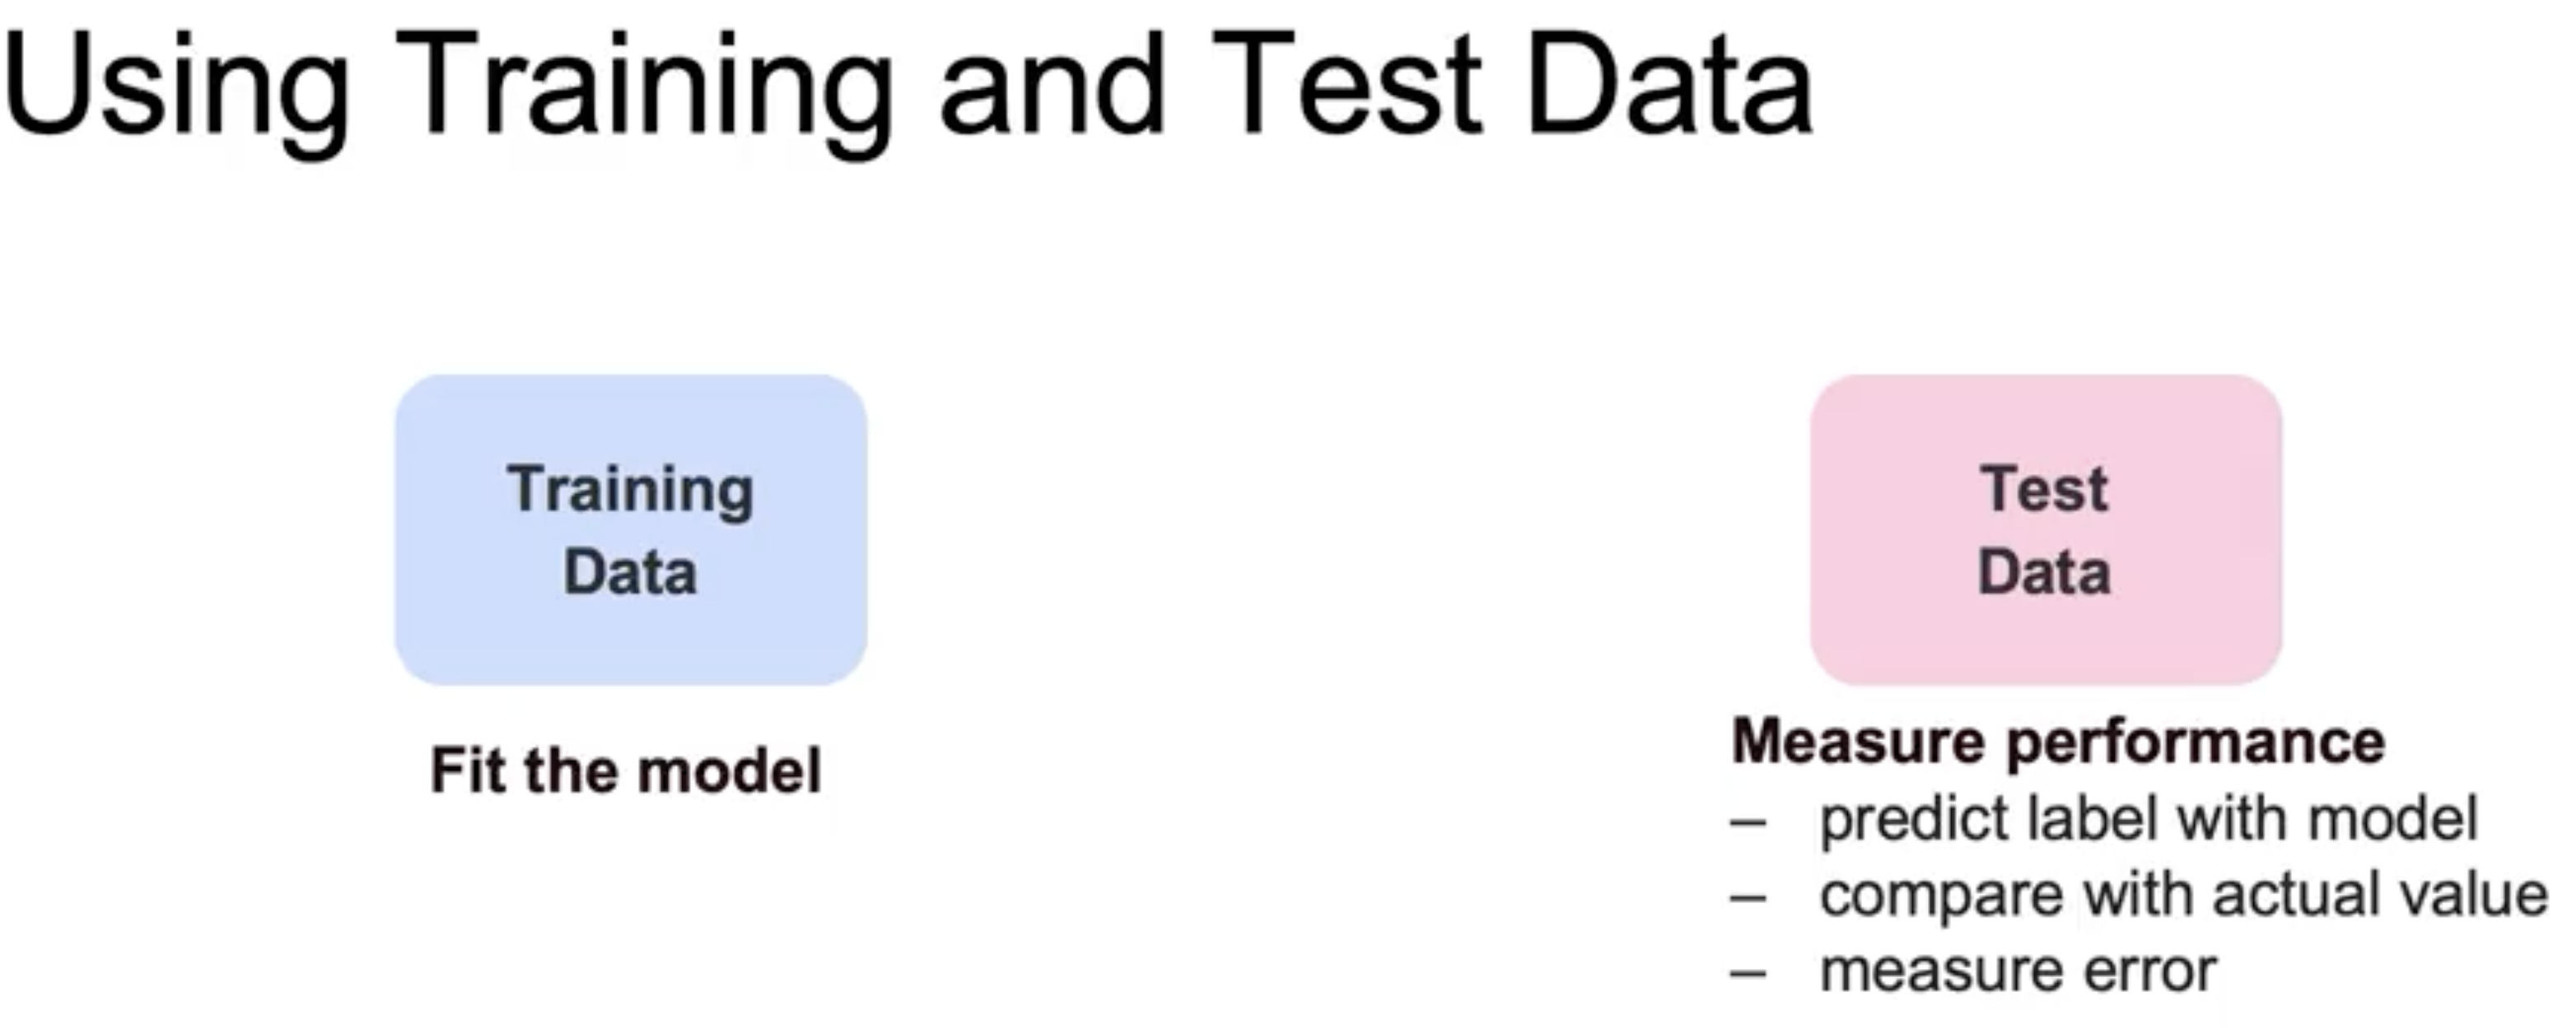

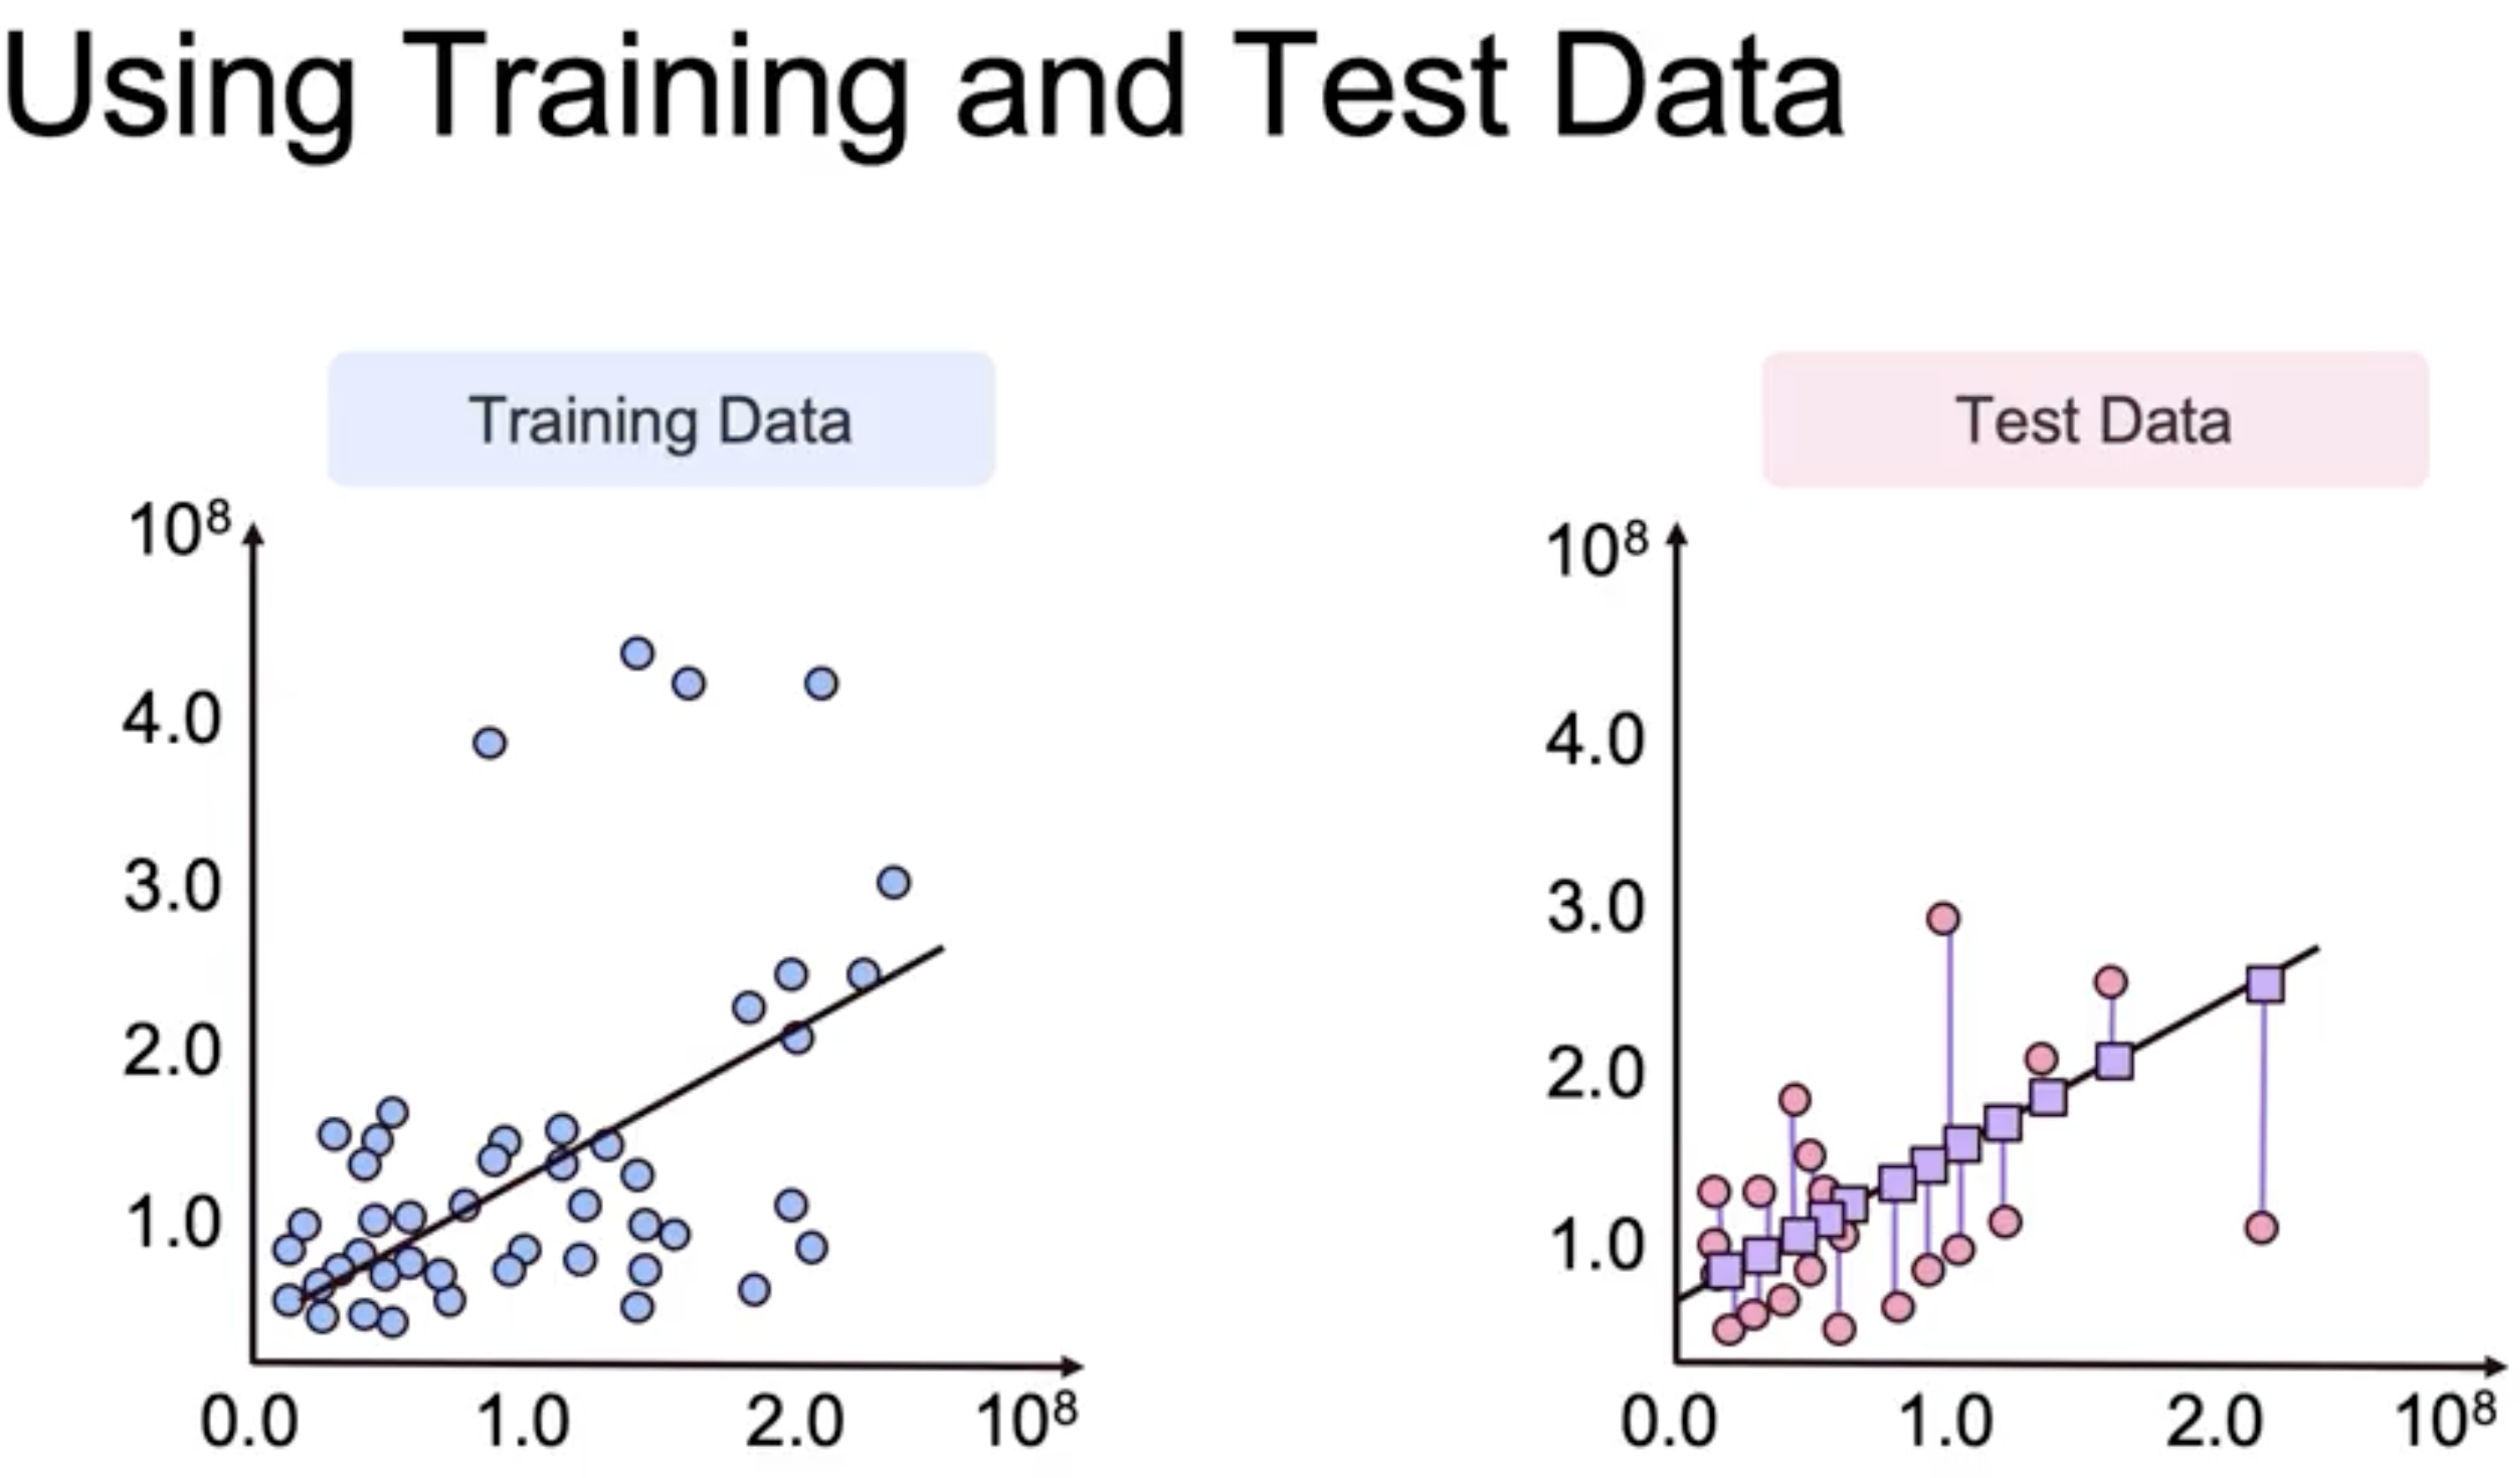

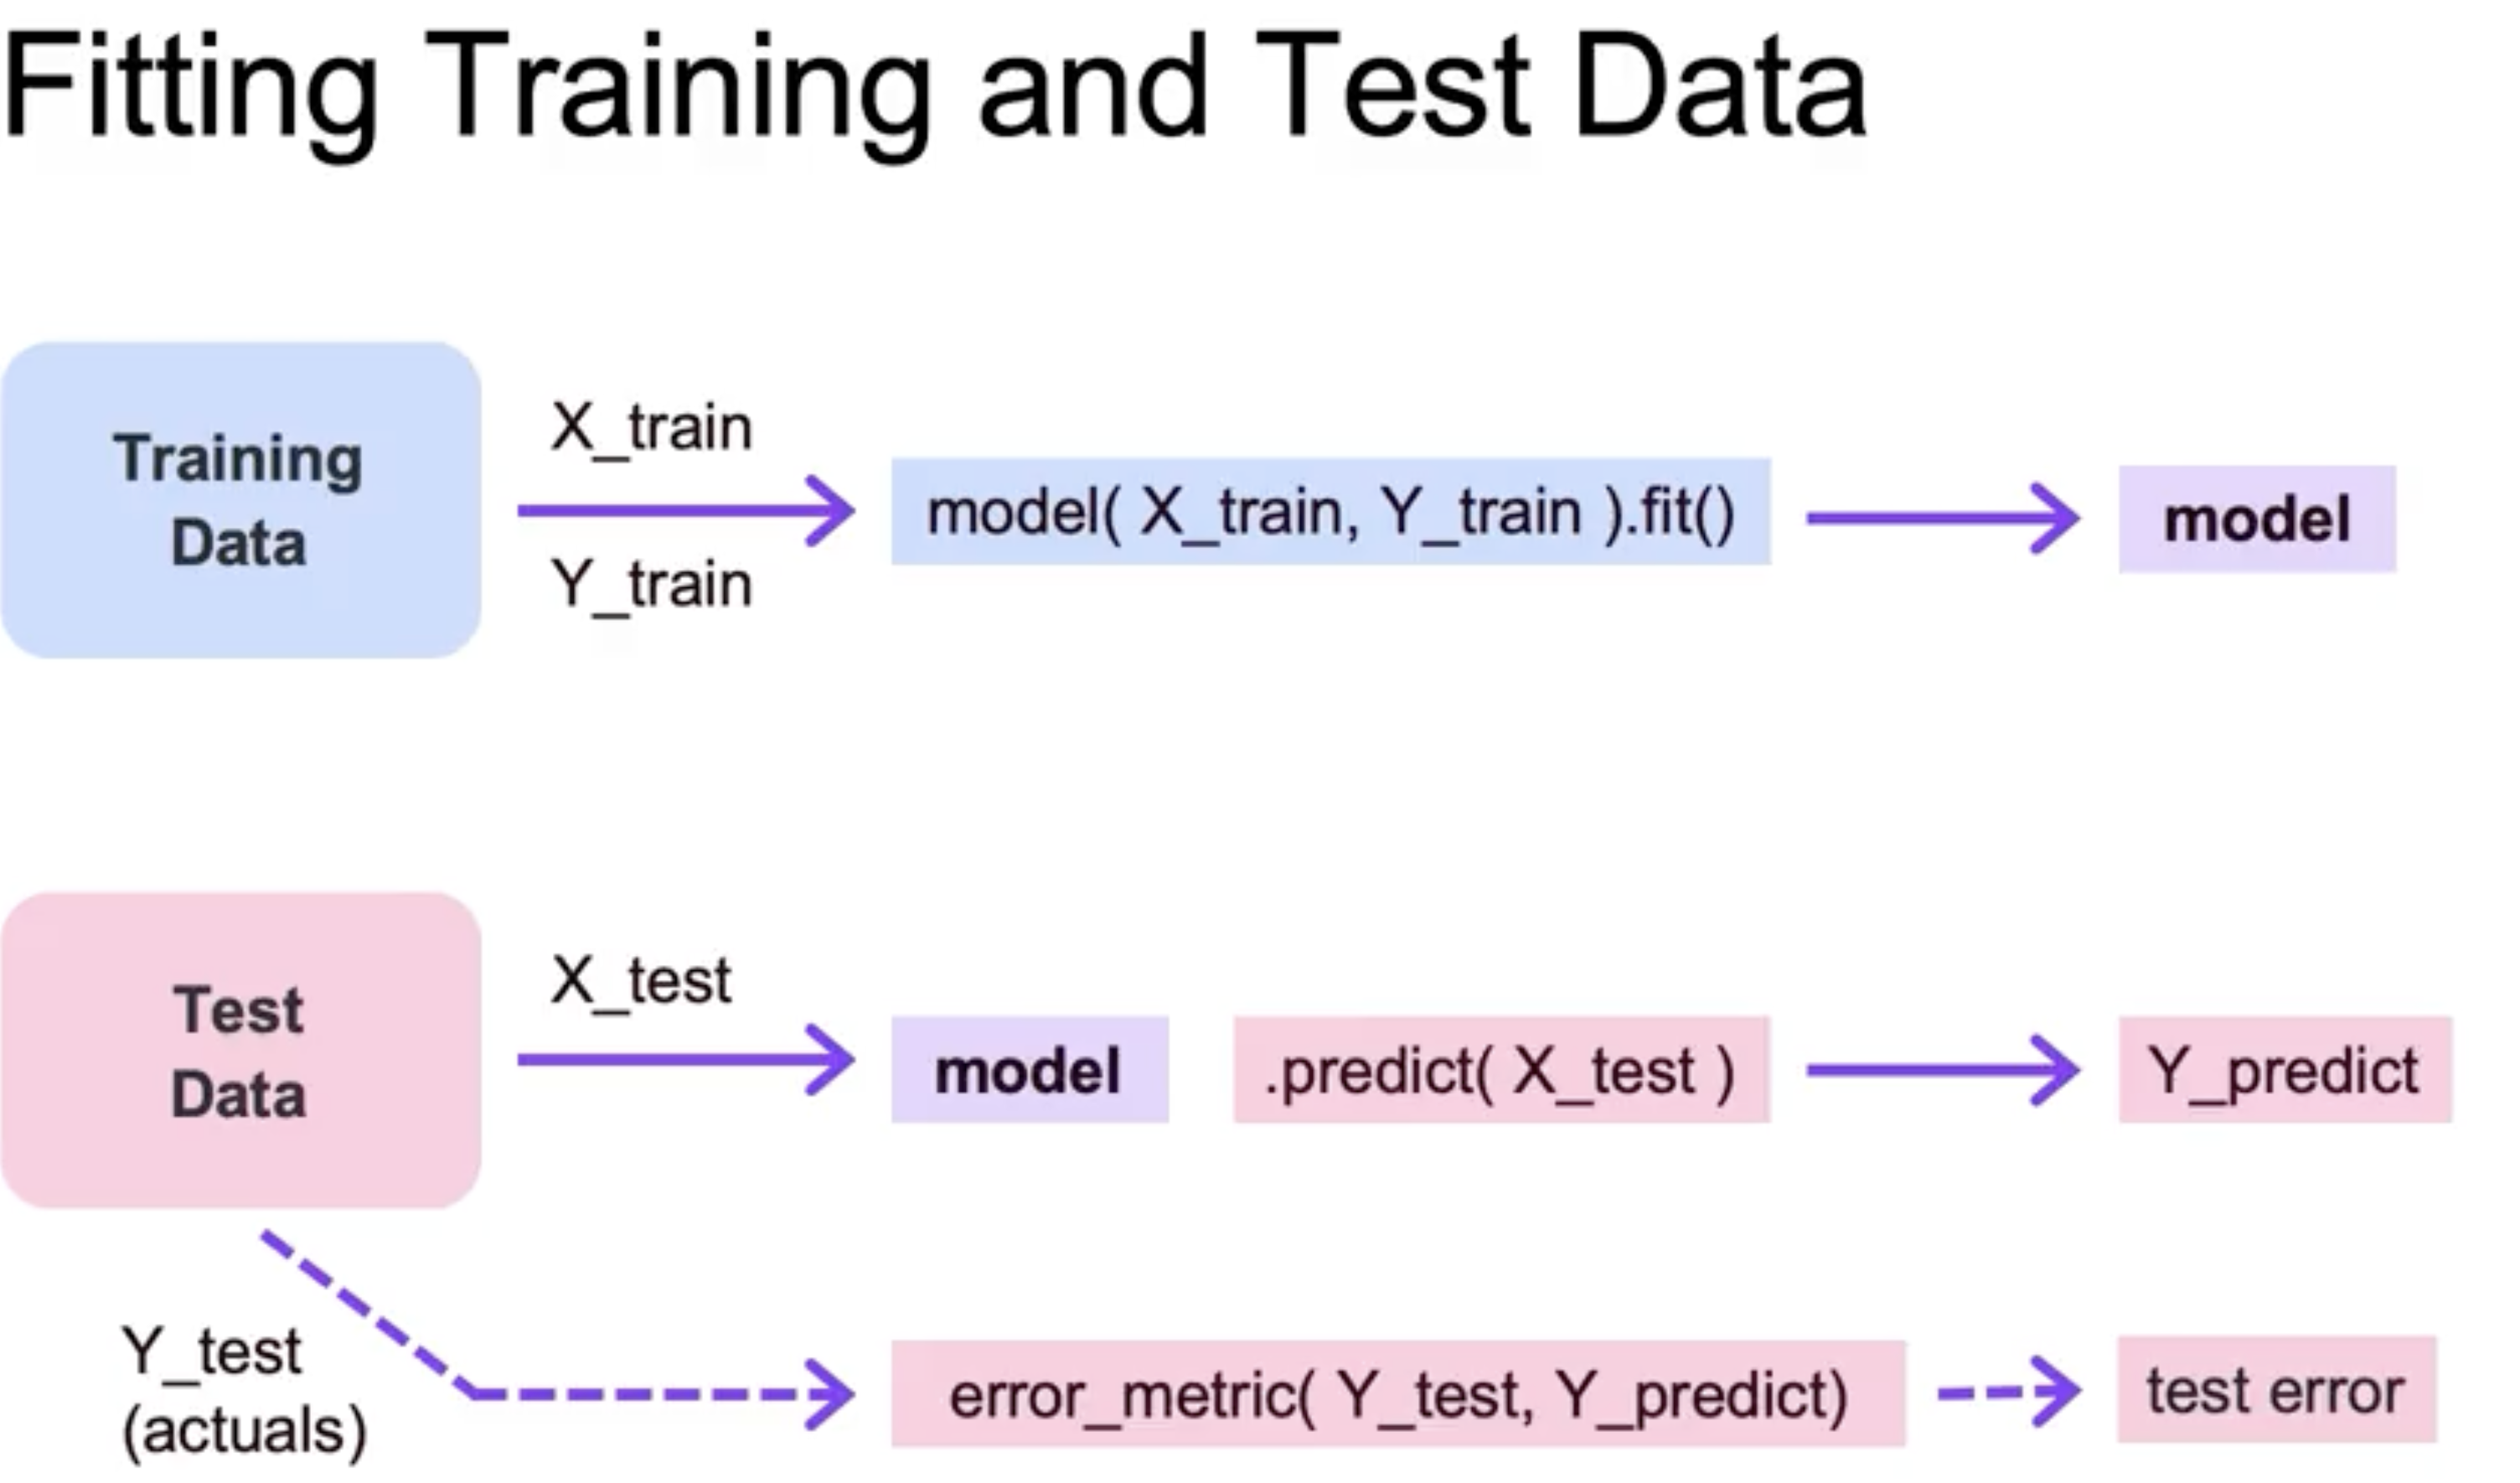

In [18]:
from IPython.display import Image, display

display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/train_test_split_1.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/train_test_split_2.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/train_test_split_3.png"))

In [19]:
import pandas as pd

file_path = "/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/AmesHousing.csv"
data = pd.read_csv(file_path)  # whitespace-separated format

data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [20]:
data.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [21]:
# Select the object (string) columns
mask = data.dtypes == object
categorical_cols = data.columns[mask]

In [22]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique(dropna = False))
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

240

In [23]:
# Let's create a new data set where all of the above categorical features will be one-hot encoded.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    print(data_ohc[col])
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
         ...   
2925    Mitchel
2926    Mitchel
2927    Mitchel
2928    Mitchel
2929    Mitchel
Name: Neighborhood, Length: 2930, dtype: object
0       Plywood
1       VinylSd
2       Wd Sdng
3       BrkFace
4       VinylSd
         ...   
2925    HdBoard
2926    HdBoard
2927    Wd Shng
2928    HdBoard
2929    HdBoard
Name: Exterior 2nd, Length: 2930, dtype: object
0       BrkFace
1       VinylSd
2       Wd Sdng
3       BrkFace
4       VinylSd
         ...   
2925    HdBoard
2926    HdBoard
2927    HdBoard
2928    HdBoard
2929    HdBoard
Name: Exterior 1st, Length: 2930, dtype: object
0       WD 
1       WD 
2       WD 
3       WD 
4       WD 
       ... 
2925    WD 
2926    WD 
2927    WD 
2928    WD 
2929    WD 
Name: Sale Type, Length: 2930, dtype: object
0        Norm
1       Feedr
2        Norm
3        Norm
4        Norm
        ...  
2925     Norm
2926     Norm
2927     Norm
2928     Norm
2929     No

In [24]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

240

In [25]:
print(data.shape[1])

# remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis =1)

print(data.shape[1])

82
39


* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same random_state in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. 

In [26]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [27]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [28]:
X_train

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
2210   2211  909275030           90          82.0      6270             5   
782     783  905325020           20          65.0     25095             5   
2310   2311  527105060           60          60.0      8238             6   
299     300  909455040          120          35.0      3907             8   
2423   2424  528228415          120           NaN      3072             7   
...     ...        ...          ...           ...       ...           ...   
1638   1639  527226040          190         195.0     41600             5   
1095   1096  528290090           60           NaN      7750             7   
1130   1131  528490080           60          64.0      8791             6   
1294   1295  902109160           50          81.0      7308             5   
860     861  907227110           85          60.0      7200             5   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
2210             6        1949            1950           0.0  ...   
782              8        1968            2003           0.0  ...   
2310             5        1997            1998           0.0  ...   
299              5        1989            1989           0.0  ...   
2423             5        2004            2004          18.0  ...   
...            ...         ...             ...           ...  ...   
1638             5        1969            1990           0.0  ...   
1095             5        2002            2002           NaN  ...   
1130             5        2003            2003           0.0  ...   
1294             5        1920            1950           0.0  ...   
860              8        1972            2003           0.0  ...   

      Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
2210        871.0             0              0               0           0   
782         452.0             0             48               0           0   
2310        400.0           421             72               0           0   
299         531.0           112             81               0           0   
2423        398.0           144             20               0           0   
...           ...           ...            ...             ...         ...   
1638        828.0           144              0               0           0   
1095        403.0           100             35               0           0   
1130        673.0           216             56               0           0   
1294        225.0             0              0             236           0   
860         396.0           192              0               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  
2210             0          0         0        8     2007  
782             60          0         0        6     2009  
2310             0          0         0        5     2006  
299              0          0         0        3     2010  
2423             0          0         0        5     2006  
...            ...        ...       ...      ...      ...  
1638             0          0         0       11     2007  
1095             0          0         0        4     2008  
1130             0          0         0        5     2008  
1294             0          0         0        6     2008  
860              0          0         0        4     2009  

[2051 rows x 38 columns]

In [38]:
# 3) Model training and evaluation
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# --- column splits ---
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# version-safe OHE
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:  # for older sklearn versions
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# no encoding: numeric only
pre_noenc = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols)
], remainder="drop")
pipe_noenc = Pipeline([
    ("pre", pre_noenc),
    ("lr", LinearRegression())
])

# one-hot encoding: impute num + cat, then OHE cats
pre_ohc = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ]), cat_cols)
], remainder="drop")
pipe_ohc = Pipeline([
    ("pre", pre_ohc),
    ("lr", LinearRegression())
])

# --- fit and evaluate ---
pipe_noenc.fit(X_train, y_train)
y_train_pred_noenc = pipe_noenc.predict(X_train)
y_test_pred_noenc  = pipe_noenc.predict(X_test)

pipe_ohc.fit(X_train, y_train)
y_train_pred_ohc = pipe_ohc.predict(X_train)
y_test_pred_ohc  = pipe_ohc.predict(X_test)

# --- results table ---
error_df = pd.concat([
    pd.Series({
        "train": mean_squared_error(y_train, y_train_pred_noenc),
        "test" : mean_squared_error(y_test,  y_test_pred_noenc)
    }, name="no enc"),
    pd.Series({
        "train": mean_squared_error(y_train, y_train_pred_ohc),
        "test" : mean_squared_error(y_test,  y_test_pred_ohc)
    }, name="one-hot enc")
], axis=1)

print(error_df)

             no enc   one-hot enc
train  1.030747e+09  1.030747e+09
test   1.102372e+09  1.102372e+09


In [39]:
# Are the train and test sets disjoint?
import numpy as np

print("Any overlap in indices?", np.intersect1d(X_train.index, X_test.index))

# Compare targets
print("y_train mean:", y_train.mean(), "y_test mean:", y_test.mean())

Any overlap in indices? []
y_train mean: 178641.25012189176 y_test mean: 185823.9499431172


In [40]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2051, 38) (879, 38)
(2051,) (879,)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)   # manual square root
    r2   = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:,.0f}, R²: {r2:.3f}")

print("--- no enc ---")
evaluate(y_train, y_train_pred_noenc, "Train")
evaluate(y_test,  y_test_pred_noenc,  "Test")

print("\n--- one-hot enc ---")
evaluate(y_train, y_train_pred_ohc, "Train")
evaluate(y_test,  y_test_pred_ohc,  "Test")

--- no enc ---
Train → RMSE: 32,105, R²: 0.831
Test → RMSE: 33,202, R²: 0.843

--- one-hot enc ---
Train → RMSE: 32,105, R²: 0.831
Test → RMSE: 33,202, R²: 0.843


In [42]:
import pandas as pd

results = pd.DataFrame({
    "no enc": {
        "Train RMSE": 32105,
        "Train R²": 0.831,
        "Test RMSE": 33202,
        "Test R²": 0.843
    },
    "one-hot enc": {
        "Train RMSE": 32105,
        "Train R²": 0.831,
        "Test RMSE": 33202,
        "Test R²": 0.843
    }
})

print(results)

               no enc  one-hot enc
Train RMSE  32105.000    32105.000
Train R²        0.831        0.831
Test RMSE   33202.000    33202.000
Test R²         0.843        0.843


* Scale the all the non-hot encoded values using one of the following: StandardScaler, MinMaxScaler, MaxAbsScaler.
* Compare the error calculated on the test sets

In [43]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer

# Define scalers
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}

# Train/test splits (original + one-hot encoded)
training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)
}

# Columns to scale (only floats)
mask = X_train.dtypes == float
float_columns = X_train.columns[mask]

# Initialize model + imputer
LR = LinearRegression()
imputer = SimpleImputer(strategy="median")

errors = {}

# Iterate through encodings and scalers
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()
        testset = _X_test.copy()

        # Impute float columns
        trainingset[float_columns] = imputer.fit_transform(trainingset[float_columns])
        testset[float_columns] = imputer.transform(testset[float_columns])

        # Scale float columns
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])

        # Fit model and evaluate
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + ' scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

# Collect results
errors = pd.Series(errors)

print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standard scaling        1.102372e+09
not_encoded - minmax scaling          1.102372e+09
not_encoded - maxabs scaling          1.102372e+09
one_hot_encoded - standard scaling    7.271825e+08
one_hot_encoded - minmax scaling      7.271825e+08
one_hot_encoded - maxabs scaling      7.271825e+08
--------------------------------------------------------------------------------
not_encoded - standard scaling 1102372063.503401
not_encoded - minmax scaling 1102372063.5826852
not_encoded - maxabs scaling 1102372063.582793
one_hot_encoded - standard scaling 727182537.7497464
one_hot_encoded - minmax scaling 727182546.807763
one_hot_encoded - maxabs scaling 727182524.4457058


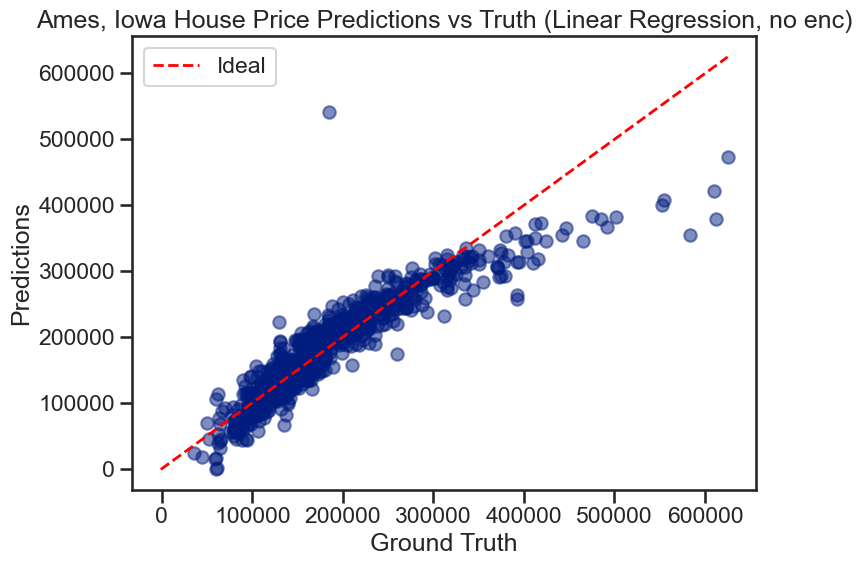

In [ ]:
# Plot predictions vs actual for one of the models.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.figure(figsize=(8, 6))
ax = plt.axes()

# use the predictions you already computed
ax.scatter(y_test, y_test_pred_noenc, alpha=0.5)

# add diagonal line
lims = [min(y_test.min(), y_test_pred_noenc.min()), max(y_test.max(), y_test_pred_noenc.max())]
ax.plot(lims, lims, 'r--', linewidth=2, label='Ideal')
ax.legend()

ax.set(
    xlabel='Ground Truth',
    ylabel='Predictions',
    title='Ames, Iowa House Price Predictions vs Truth (Linear Regression, no enc)'
)

plt.tight_layout()
plt.show()